In [107]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Pokemon.csv']


In [108]:
df=pd.read_csv('../input/Pokemon.csv')
df=df.drop('#',axis=1)
df = df.set_index('Name')
df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [109]:
df.columns = [c.replace(' ', '_') for c in df.columns]
po_type=set(df.Type_1)
po_type

{'Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water'}

In [110]:
summary=df.describe()
summary

,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [111]:
po_ttotal=[]
for i in po_type:
   
    y=df.Total[df.Type_1==i]
    add=sum(y)
    po_ttotal.append(add)
    
print(po_ttotal)

[39365, 13818, 14000, 17617, 19510, 27129, 11244, 1940, 26146, 23820, 7024, 13168, 11176, 29480, 10403, 19965, 14066, 48211]


In [112]:
keys=list(po_type)
values=po_ttotal
#new_dict = {k: v for k, v in zip(keys, values)} # list comprehension
dictionary = dict(zip(keys, values))
print(dictionary)


{'Normal': 39365, 'Dark': 13818, 'Ground': 14000, 'Dragon': 17617, 'Electric': 19510, 'Psychic': 27129, 'Fighting': 11244, 'Flying': 1940, 'Bug': 26146, 'Fire': 23820, 'Fairy': 7024, 'Steel': 13168, 'Poison': 11176, 'Grass': 29480, 'Ice': 10403, 'Rock': 19965, 'Ghost': 14066, 'Water': 48211}


Text(0.5, 1.0, 'Total strength')

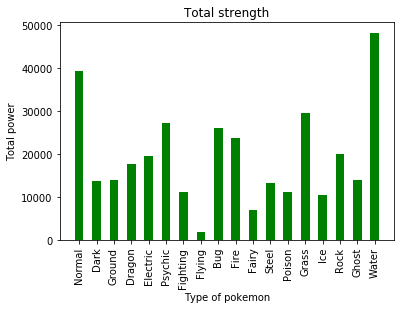

In [113]:
import matplotlib.pyplot as plt
x=plt.bar(dictionary.keys(), dictionary.values(),width = 0.5, color='g',)

x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)
x = plt.gca()
x.set_xlabel('Type of pokemon')
x.set_ylabel('Total power')
x.set_title('Total strength')

In [114]:
#df.head()
y=df[df['Legendary']==True]
z=df[df['Legendary']==False]
print('The legendary pokemons are {}'.format(len(y)))
print('The non legendary pokemons are {}'.format(len(z)))

The legendary pokemons are 65
The non legendary pokemons are 735


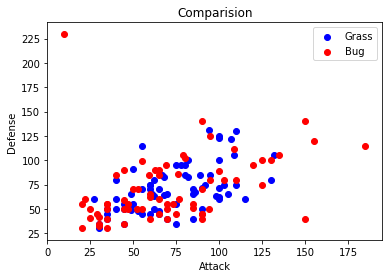

In [115]:
a=df[df['Type_1']=='Grass']
b=df[df['Type_1']=='Bug']

s1=(sum(a['Total']))
s2=(sum(b['Total']))
s1=plt.scatter(x='Attack',y='Defense', c='blue',data=a)
s2=plt.scatter(x='Attack',y='Defense', c='red',data=b)
x = plt.gca()
x.set_xlabel('Attack')
x.set_ylabel('Defense')
x.set_title('Comparision')
x.legend((s1,s2),('Grass','Bug'))

select type to plot 0.Normal, 1.Dark, 2.Ground, 3.Dragon, 4.Electric, 5.Psychic, 6.Fighting, 7.Flying, 8.Bug, 9.Fire, 10.Fairy, 11.Steel, 12.Poison, 13.Grass, 14.Ice, 15.Rock, 16.Ghost, 17.Water
 1
 17


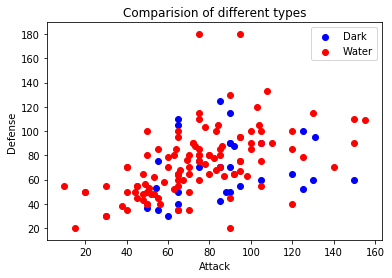

In [123]:
print('select type to plot 0.Normal, 1.Dark, 2.Ground, 3.Dragon, 4.Electric, 5.Psychic, 6.Fighting, 7.Flying, 8.Bug, 9.Fire, 10.Fairy, 11.Steel, 12.Poison, 13.Grass, 14.Ice, 15.Rock, 16.Ghost, 17.Water')
d=int(input(' '))

e=int(input(' '))

keys=list(po_type)
t1=keys[d]
t2=keys[e]


a=df[df['Type_1']==t1]
b=df[df['Type_1']==t2]

s1=(sum(a['Total']))
s2=(sum(b['Total']))
s1=plt.scatter(x='Attack',y='Defense', c='blue',data=a)
s2=plt.scatter(x='Attack',y='Defense', c='red',data=b)
x = plt.gca()
x.set_xlabel('Attack')
x.set_ylabel('Defense')
x.set_title('Comparision of different types')
x.legend((s1,s2),(t1,t2))





# 